# 二項ロジスティック回帰

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 表示する文字サイズを調整
plt.rc("font", size=20)
plt.rc("legend", fontsize=16)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)

# 乱数
np.random.seed(777)

# ロジット関数の可視化

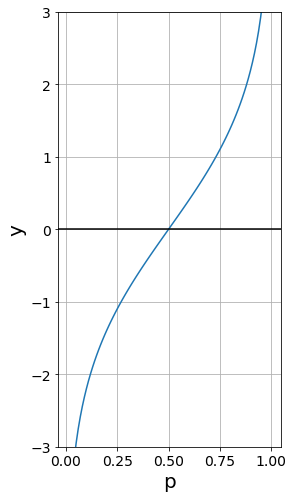

In [3]:
fig = plt.figure(figsize=(4, 8))
p = np.linspace(0.01, 0.999, num=100)
y = np.log(p / (1 - p))
plt.plot(p, y)

plt.xlabel("p")
plt.ylabel("y")
plt.axhline(y=0, color="k")
plt.ylim(-3, 3)
plt.grid()
plt.show()

# ロジスティック回帰
人工的に生成したデータに対してロジスティック回帰を実行します。

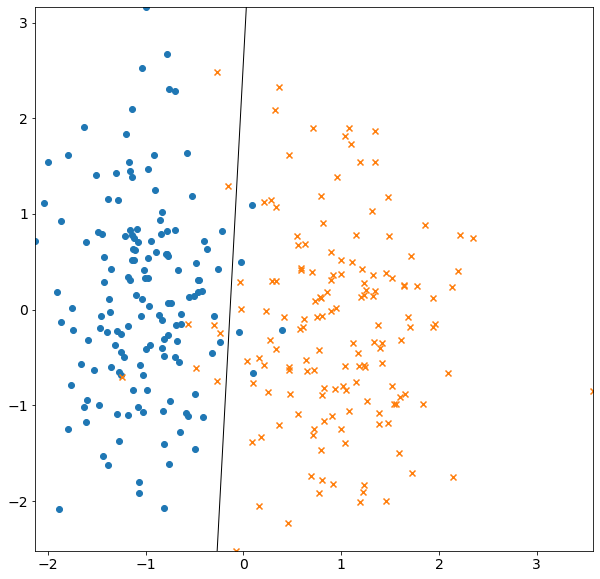

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# データセット
X, Y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=1,
    random_state=2,
    n_clusters_per_class=1,
)

# ロジスティック回帰を学習
clf = LogisticRegression()
clf.fit(X, Y)

# 決定境界の直線を求める
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
b_1 = -w1 / w2
b_0 = -b / w2
xmin, xmax = np.min(X[:, 0]), np.max(X[:, 0])
ymin, ymax = np.min(X[:, 1]), np.max(X[:, 1])
xd = np.array([xmin, xmax])
yd = b_1 * xd + b_0

# グラフを描画
plt.figure(figsize=(10, 10))
plt.plot(xd, yd, "k", lw=1, ls="-")
plt.scatter(*X[Y == 0].T, marker="o")
plt.scatter(*X[Y == 1].T, marker="x")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()